In [3]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import time
import matplotlib.pyplot as plt
import gzip
import urllib.request

In [4]:
# Đường dẫn đến tập dữ liệu
train_url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
local_file_train = 'kddcup.data_10_percent.gz'
# Đường dẫn đến tập dữ liệu
test_url = 'http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz'
local_file_test = 'corrected.gz'

In [5]:
# Tên các cột trong tập dữ liệu
col_names = ["duration", "protocol_type", "service", "src_bytes",
             "dst_bytes", "flag","land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
             "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
             "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
             "is_host_login", "is_guest_login", "count", "e", "serror_rate",
             "rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_serror_rate","srv_rerror_rate",
            "srv_diff_host_rate","dst_host_count", "dst_host_srv_count",
            "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
            "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
            "dst_host_rerror_rate", "dst_host_srv_rerror_rate","label"]

# Tải tập tin từ URL về địa phương
urllib.request.urlretrieve(train_url, local_file_train)
urllib.request.urlretrieve(test_url, local_file_test)

# Đọc tập dữ liệu từ tập tin đã tải về địa phương
with gzip.open(local_file_train, 'rt') as f:
    # names=col_names, , header=None, nrows=1000000)
    df = pd.read_csv(f, names=col_names, header=None)
# Đọc tập dữ liệu từ tập tin đã tải về địa phương
with gzip.open(local_file_test, 'rt') as f:
    # names=col_names,header=None, nrows=500000)
    df_test = pd.read_csv(f, names=col_names,  header=None)
# In ra 5 dòng đầu tiên của tập dữ liệu để kiểm tra
print(df_test.head())

   duration protocol_type  service src_bytes  dst_bytes  flag  land  \
0         0           udp  private        SF        105   146     0   
1         0           udp  private        SF        105   146     0   
2         0           udp  private        SF        105   146     0   
3         0           udp  private        SF        105   146     0   
4         0           udp  private        SF        105   146     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                 254   
1               0       0    0  ...                 254   
2               0       0    0  ...                 254   
3               0       0    0  ...                 254   
4               0       0    0  ...                 254   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                    0.01   
1                     1.0                    0.01   
2                     1.0                    0.01   
3     

In [4]:
# train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
# test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'
# col_names = ["duration", "protocol_type", "service", "flag", "src_bytes",
#              "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
#              "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
#              "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
#              "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
#              "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
#              "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
#              "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
#              "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
#              "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]


# df = pd.read_csv(train_url, header=None, names=col_names)

# df_test = pd.read_csv(test_url, header=None, names=col_names)

In [24]:
print('Kích thước của tập huấn luyện:', df.shape)
print('Kích thước của tập kiểm tra:', df_test.shape)

Kích thước của tập huấn luyện: (494021, 42)
Kích thước của tập kiểm tra: (311029, 42)


In [6]:
df.head(5)

,duration,protocol_type,service,src_bytes,dst_bytes,flag,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df_test.head(5)

,duration,protocol_type,service,src_bytes,dst_bytes,flag,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [6]:
# Loại bỏ dấu chấm cuối từ trong cột 'label' của tập huấn luyện
df['label'] = df['label'].str.rstrip('.')
df_test['label'] = df_test['label'].str.rstrip('.')
print('Phân phối nhãn trong tập huấn luyện:')
print(df['label'].value_counts())
print()
print('Phân phối nhãn trong tập kiểm tra:')
print(df_test['label'].value_counts())

Phân phối nhãn trong tập huấn luyện:
label
smurf              280790
neptune            107201
normal              97278
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64

Phân phối nhãn trong tập kiểm tra:
label
smurf              164091
normal              60593
neptune             58001
snmpgetattack        7741
mailbomb             5000
guess_passwd         4367
snmpguess            2406
satan                1633
warezmaster          1602
back                 1098
mscan                1053
apach

**Bước 1: Tiền xử lý dữ liệu:**

One-Hot-Encoding được sử dụng để chuyển đổi tất cả các tính năng phân loại thành các tính năng nhị phân.

Yêu cầu của việc mã hóa one-hot là đầu vào của bộ biến đổi này phải

là một ma trận số nguyên biểu diễn các giá trị được lấy từ các tính năng phân loại (rời rạc).

Đầu ra sẽ là một ma trận thưa mỗi cột tương ứng với một giá trị có thể có.

Giả định là các tính năng đầu vào có giá trị trong khoảng [0, n_values].

Do đó, trước tiên các tính năng cần được chuyển đổi thành số bằng LabelEncoder để mỗi loại được biểu diễn bằng một số.

In [7]:
# Các cột là phân loại, nhưng chưa nhị phân: loại_giao_protocol (cột 2), dịch_vụ (cột 3), cờ (cột 4).
print('Bộ dữ liệu huấn luyện:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Đặc trưng '{col_name}' có {unique_cat} loại".format(
            col_name=col_name, unique_cat=unique_cat))

print()
print('Phân phối các loại trong dịch vụ:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Bộ dữ liệu huấn luyện:
Đặc trưng 'protocol_type' có 3 loại
Đặc trưng 'service' có 66 loại
Đặc trưng 'src_bytes' có 11 loại
Đặc trưng 'label' có 23 loại

Phân phối các loại trong dịch vụ:
service
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
Name: count, dtype: int64


In [8]:
# Test set
print('Bộ dữ liệu kiểm tra:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object':
        unique_cat = len(df_test[col_name].unique())
        print("Đặc trưng '{col_name}' có {unique_cat} loại".format(
            col_name=col_name, unique_cat=unique_cat))

print()
print('Phân phối các loại trong dịch vụ:')
print(df_test['service'].value_counts().sort_values(ascending=False).head())

Bộ dữ liệu kiểm tra:
Đặc trưng 'protocol_type' có 3 loại
Đặc trưng 'service' có 65 loại
Đặc trưng 'src_bytes' có 11 loại
Đặc trưng 'label' có 38 loại

Phân phối các loại trong dịch vụ:
service
ecr_i      164352
private     78510
http        41237
smtp         8268
pop_3        3972
Name: count, dtype: int64


**LabelEncoder**

**Chèn các đặc điểm phân loại vào một mảng numpy 2D**

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
categorical_columns = ['protocol_type', 'service', 'src_bytes']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,src_bytes
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


In [10]:
testdf_categorical_values.head()

,protocol_type,service,src_bytes
0,udp,private,SF
1,udp,private,SF
2,udp,private,SF
3,udp,private,SF
4,udp,private,SF


In [11]:

# protocol type
unique_protocol = sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service = sorted(df.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag = sorted(df.src_bytes.unique())
string3 = 'src_bytes_'
unique_flag2 = [string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols = unique_protocol2 + unique_service2 + unique_flag2


# do it for test set
unique_service_test = sorted(df_test.service.unique())
unique_service2_test = [string2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh'

**Biến đổi các đặc trưng phân loại thành số bằng cách sử dụng LabelEncoder()**

In [12]:
df_categorical_values_enc = df_categorical_values.apply(
    LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc = testdf_categorical_values.apply(
    LabelEncoder().fit_transform)
print(testdf_categorical_values.head())
print('--------------------')
print(testdf_categorical_values_enc.head())

  protocol_type service src_bytes
0           tcp    http        SF
1           tcp    http        SF
2           tcp    http        SF
3           tcp    http        SF
4           tcp    http        SF
--------------------
   protocol_type  service  src_bytes
0              1       22          9
1              1       22          9
2              1       22          9
3              1       22          9
4              1       22          9
  protocol_type  service src_bytes
0           udp  private        SF
1           udp  private        SF
2           udp  private        SF
3           udp  private        SF
4           udp  private        SF
--------------------
   protocol_type  service  src_bytes
0              2       46          9
1              2       46          9
2              2       46          9
3              2       46          9
4              2       46          9


**One-Hot-Encoding**

In [13]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(
    df_categorical_values_encenc.toarray(), columns=dumcols)


# test set
testdf_categorical_values_encenc = enc.fit_transform(
    testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(
    testdf_categorical_values_encenc.toarray(), columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,src_bytes_REJ,src_bytes_RSTO,src_bytes_RSTOS0,src_bytes_RSTR,src_bytes_S0,src_bytes_S1,src_bytes_S2,src_bytes_S3,src_bytes_SF,src_bytes_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
testdf_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,src_bytes_REJ,src_bytes_RSTO,src_bytes_RSTOS0,src_bytes_RSTR,src_bytes_S0,src_bytes_S1,src_bytes_S2,src_bytes_S3,src_bytes_SF,src_bytes_SH
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Thêm cột thiếu trong tập dữ liệu kiểm tra**

In [15]:
trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()
difference = list(set(testservice)-set(trainservice))
string = 'service_'
difference = [string + x for x in difference]
difference

['service_icmp']

In [16]:
trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()
difference1 = list(set(trainservice) - set(testservice))
difference1 = [string + x for x in difference1]
difference1

['service_red_i', 'service_urh_i']

In [17]:
for col in difference:
    df_cat_data[col] = 0
for col1 in difference1:
    testdf_cat_data[col1] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)

(494021, 81)
(311029, 81)


**Thêm các cột số mới vào trong DataFrame chính**

In [18]:
# Gộp df và df_cat_data lại với nhau, chỉ giữ lại các cột mong muốn
newdf = df.merge(df_cat_data, left_index=True, right_index=True)

# Loại bỏ các cột dạng category gốc
newdf.drop(columns=categorical_columns, inplace=True)

# Làm tương tự cho dữ liệu kiểm tra
newdf_test = df_test.merge(testdf_cat_data, left_index=True, right_index=True)
newdf_test.drop(columns=categorical_columns, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(494021, 120)
(311029, 120)


Tập dữ liệu được chia thành các tập dữ liệu riêng biệt cho từng loại tấn công.

Thẻ tấn công đã được đổi tên cho mỗi thẻ. 0=Bình thường, 1=DoS, 2=Probe, 3=R2L, 4=U2R.

Trong bộ dữ liệu mới, cột nhãn đã được thay thế bằng các giá trị mới.

Dos:

Probe:

R2L :

U2R:

In [19]:
labeldf = newdf['label']
labeldf_test = newdf_test['label']


# thay đổi cột nhãn
newlabeldf = labeldf.replace({'normal': 0, 'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1, 'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                              'ipsweep': 1, 'nmap': 1, 'portsweep': 1, 'satan': 1, 'mscan': 1, 'saint': 1,
                              'ftp_write': 1, 'guess_passwd': 1, 'imap': 1, 'multihop': 1, 'phf': 1, 'spy': 1, 'warezclient': 1, 'warezmaster': 1, 'sendmail': 1, 'named': 1, 'snmpgetattack': 1, 'snmpguess': 1, 'xlock': 1, 'xsnoop': 1, 'httptunnel': 1,
                              'buffer_overflow': 1, 'loadmodule': 1, 'perl': 1, 'rootkit': 1, 'ps': 1, 'sqlattack': 1, 'xterm': 1})
newlabeldf_test = labeldf_test.replace({'normal': 0, 'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1, 'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                                        'ipsweep': 1, 'nmap': 1, 'portsweep': 1, 'satan': 1, 'mscan': 1, 'saint': 1, 'ftp_write': 1, 'guess_passwd': 1, 'imap': 1, 'multihop': 1, 'phf': 1, 'spy': 1, 'warezclient': 1, 'warezmaster': 1, 'sendmail': 1, 'named': 1, 'snmpgetattack': 1, 'snmpguess': 1, 'xlock': 1, 'xsnoop': 1, 'httptunnel': 1,
                                        'buffer_overflow': 1, 'loadmodule': 1, 'perl': 1, 'rootkit': 1, 'ps': 1, 'sqlattack': 1, 'xterm': 1})


# đặt cột nhãn mới trở lại
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
# newdf_test['label'] = newdf_test['label'].fillna(int(0))
# # Chuyển đổi cột nhãn sang kiểu số nguyên
# newdf_test['label'] = newdf_test['label'].astype(int)


In [22]:
newdf['label']

0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: label, Length: 494021, dtype: int64

In [23]:
newdf_test['label']

0         0
1         0
2         0
3         1
4         1
         ..
311024    0
311025    0
311026    0
311027    0
311028    0
Name: label, Length: 311029, dtype: int64

**Bước 2: Chuẩn hóa đặc trưng**

In [20]:
# Chia các khung dữ liệu thành X & Y
# Thuộc tính X, biến kết quả Y
X_Df = newdf.drop('label', axis=1)
Y_Df = newdf.label

# test set
X_Df_test = newdf_test.drop('label', axis=1)
Y_Df_test = newdf_test.label

**Cột sẽ được loại bỏ ở bước này, vì vậy sẽ lưu lại tên cột để sử dụng sau này.**

In [21]:
colNames = list(X_Df)
colNames_test = list(X_Df_test)

In [26]:
X_Df

,duration,dst_bytes,flag,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,src_bytes_RSTO,src_bytes_RSTOS0,src_bytes_RSTR,src_bytes_S0,src_bytes_S1,src_bytes_S2,src_bytes_S3,src_bytes_SF,src_bytes_SH,service_icmp
0,0,181,5450,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0,235,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0,219,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
494017,0,282,2286,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
494018,0,203,1200,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
494019,0,291,1200,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [27]:
X_Df_test.head()

,duration,dst_bytes,flag,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,src_bytes_RSTOS0,src_bytes_RSTR,src_bytes_S0,src_bytes_S1,src_bytes_S2,src_bytes_S3,src_bytes_SF,src_bytes_SH,service_red_i,service_urh_i
0,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
3,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [31]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_Df)
X_Df = scaler1.transform(X_Df)

# test data
scaler5 = preprocessing.StandardScaler().fit(X_Df_test)
X_Df_test = scaler5.transform(X_Df_test)

In [29]:
X_Df_test

array([[-0.0439176 , -0.0127428 , -0.03734417, ..., -0.01643607,
         0.        ,  0.        ],
       [-0.0439176 , -0.0127428 , -0.03734417, ..., -0.01643607,
         0.        ,  0.        ],
       [-0.0439176 , -0.0127428 , -0.03734417, ..., -0.01643607,
         0.        ,  0.        ],
       ...,
       [-0.0439176 , -0.0127428 , -0.03728213, ..., -0.01643607,
         0.        ,  0.        ],
       [-0.0439176 , -0.0127428 , -0.03728213, ..., -0.01643607,
         0.        ,  0.        ],
       [-0.0439176 , -0.0127428 , -0.03728213, ..., -0.01643607,
         0.        ,  0.        ]])

In [32]:
X_Df

array([[-0.06779172, -0.00287853,  0.13866441, ...,  0.55264304,
        -0.01471859,  0.        ],
       [-0.06779172, -0.00281984, -0.01157787, ...,  0.55264304,
        -0.01471859,  0.        ],
       [-0.06779172, -0.00282388,  0.01417881, ...,  0.55264304,
        -0.01471859,  0.        ],
       ...,
       [-0.06779172, -0.00285627,  0.01003232, ...,  0.55264304,
        -0.01471859,  0.        ],
       [-0.06779172, -0.00276722,  0.01003232, ...,  0.55264304,
        -0.01471859,  0.        ],
       [-0.06779172, -0.00284007,  0.01106138, ...,  0.55264304,
        -0.01471859,  0.        ]])

In [33]:
print(X_Df.shape)

(494021, 119)


In [34]:
print(X_Df_test.shape)

(311029, 119)


#   

# SVM

In [38]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [34]:
clf_SVM_Df = SVC(kernel='linear', C=1.0, random_state=0)
train0 = time.time()
clf_SVM_Df.fit(X_Df, Y_Df.astype(int))
train1 = time.time() - train0

In [35]:
test0 = time.time()

Y_Df_pred = clf_SVM_Df.predict(X_Df_test)
test1 = time.time() - test0
# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,32921,27672
1,11753,238683


In [36]:
accuracy1 = cross_val_score(clf_SVM_Df, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy1.mean(), accuracy1.std() * 2))
precision1 = cross_val_score(clf_SVM_Df, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision1.mean(), precision1.std() * 2))
recall1 = cross_val_score(clf_SVM_Df, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall1.mean(), recall1.std() * 2))
f = cross_val_score(clf_SVM_Df, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train1)
print("Thời gian kiểm tra:%.3fs\n" % test1)

Độ chính xác: 0.94094 (+/- 0.14495)
Độ chính xác của dự đoán tích cực: 0.99438 (+/- 0.01572)
Tỷ lệ nhớ lại: 0.93216 (+/- 0.18388)
F-measure: 0.95959 (+/- 0.10646)
Thời gian huấn luyện:1460.859s

Thời gian kiểm tra:63.916s



In [37]:
clf_SVM_Df1 = SVC(kernel='rbf', C=1.0, random_state=0)
train2 = time.time()
clf_SVM_Df1.fit(X_Df, Y_Df.astype(int))
train3 = time.time() - train2

In [38]:
test2 = time.time()
Y_Df_pred = clf_SVM_Df1.predict(X_Df_test)
test3 = time.time() - test2

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,59139,1454
1,19438,230998


In [39]:
accuracy3 = cross_val_score(clf_SVM_Df1, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy3.mean(), accuracy3.std() * 2))
precision3 = cross_val_score(clf_SVM_Df1, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision3.mean(), precision3.std() * 2))
recall3 = cross_val_score(clf_SVM_Df1, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall3.mean(), recall3.std() * 2))
f = cross_val_score(clf_SVM_Df1, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train3)
print("Thời gian kiểm tra:%.3fs\n" % test3)

Độ chính xác: 0.94651 (+/- 0.14095)
Độ chính xác của dự đoán tích cực: 0.99571 (+/- 0.01580)
Tỷ lệ nhớ lại: 0.93785 (+/- 0.17854)
F-measure: 0.96339 (+/- 0.10365)
Thời gian huấn luyện:940.320s

Thời gian kiểm tra:120.405s



In [40]:
clf_SVM_Df2 = SVC(kernel='poly', C=1.0, random_state=0)
train4 = time.time()
clf_SVM_Df2.fit(X_Df, Y_Df.astype(int))
train5 = time.time() - train4

In [41]:
test4 = time.time()
Y_Df_pred = clf_SVM_Df2.predict(X_Df_test)
test5 = time.time() - test4

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,47404,13189
1,7361,243075


In [42]:
accuracy5 = cross_val_score(clf_SVM_Df2, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy5.mean(), accuracy5.std() * 2))
precision5 = cross_val_score(clf_SVM_Df2, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision5.mean(), precision5.std() * 2))
recall5 = cross_val_score(clf_SVM_Df2, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall5.mean(), recall5.std() * 2))
f = cross_val_score(clf_SVM_Df2, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train5)
print("Thời gian kiểm tra:%.3fs\n" % test5)

Độ chính xác: 0.94325 (+/- 0.15034)
Độ chính xác của dự đoán tích cực: 0.99518 (+/- 0.01435)
Tỷ lệ nhớ lại: 0.93427 (+/- 0.19020)
F-measure: 0.96087 (+/- 0.11216)
Thời gian huấn luyện:332.467s

Thời gian kiểm tra:55.853s



In [43]:
clf_SVM_Df3 = SVC(kernel='sigmoid', C=1.0, random_state=0)
train6 = time.time()
clf_SVM_Df3.fit(X_Df, Y_Df.astype(int))
train7 = time.time() - train6

In [44]:
test6 = time.time()
Y_Df_pred = clf_SVM_Df3.predict(X_Df_test)
test7 = time.time() - test6

# Tạo ma trận lỗi
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,59452,1141
1,43921,206515


In [45]:
accuracy7 = cross_val_score(clf_SVM_Df3, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy7.mean(), accuracy7.std() * 2))
precision7 = cross_val_score(clf_SVM_Df3, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision7.mean(), precision7.std() * 2))
recall7 = cross_val_score(clf_SVM_Df3, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall7.mean(), recall7.std() * 2))
f = cross_val_score(clf_SVM_Df3, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train7)
print("Thời gian kiểm tra:%.3fs\n" % test7)

Độ chính xác: 0.91269 (+/- 0.19650)
Độ chính xác của dự đoán tích cực: 0.97740 (+/- 0.03701)


# Naive Bayes

In [39]:
import time
from sklearn.naive_bayes import GaussianNB

In [40]:
# Tạo đối tượng phân loại GaussianNB
clf_Naive = GaussianNB()
train8 = time.time()
# Đào tạo trình phân loại GaussianNB
clf_Naive = clf_Naive.fit(X_Df, Y_Df.astype(int))
train9 = time.time() - train8

In [41]:
test8 = time.time()
Y_Df_pred=clf_Naive.predict(X_Df_test)
test9 = time.time() - test8

# Tạo ma trận lỗi
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,60381,212
1,241036,9400


In [42]:
accuracy9 = cross_val_score(clf_Naive, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy9.mean(), accuracy9.std() * 2))
precision9 = cross_val_score(clf_Naive, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision9.mean(), precision9.std() * 2))
recall9 = cross_val_score(clf_Naive, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall9.mean(), recall9.std() * 2))
f = cross_val_score(clf_Naive, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train9)
print("Thời gian kiểm tra:%.3fs\n" % test9)

Độ chính xác: 0.48696 (+/- 0.58310)
Độ chính xác của dự đoán tích cực: 0.83581 (+/- 0.49450)
Tỷ lệ nhớ lại: 0.36593 (+/- 0.73253)
F-measure: 0.42884 (+/- 0.79184)
Thời gian huấn luyện:1.681s

Thời gian kiểm tra:1.298s



**So sánh Thời gian Huấn luyện, Thời gian Kiểm tra, Độ chính xác, Độ chính xác Thực tế, và Tỷ lệ nhớ lại cho các nhân SVM khác nhau**

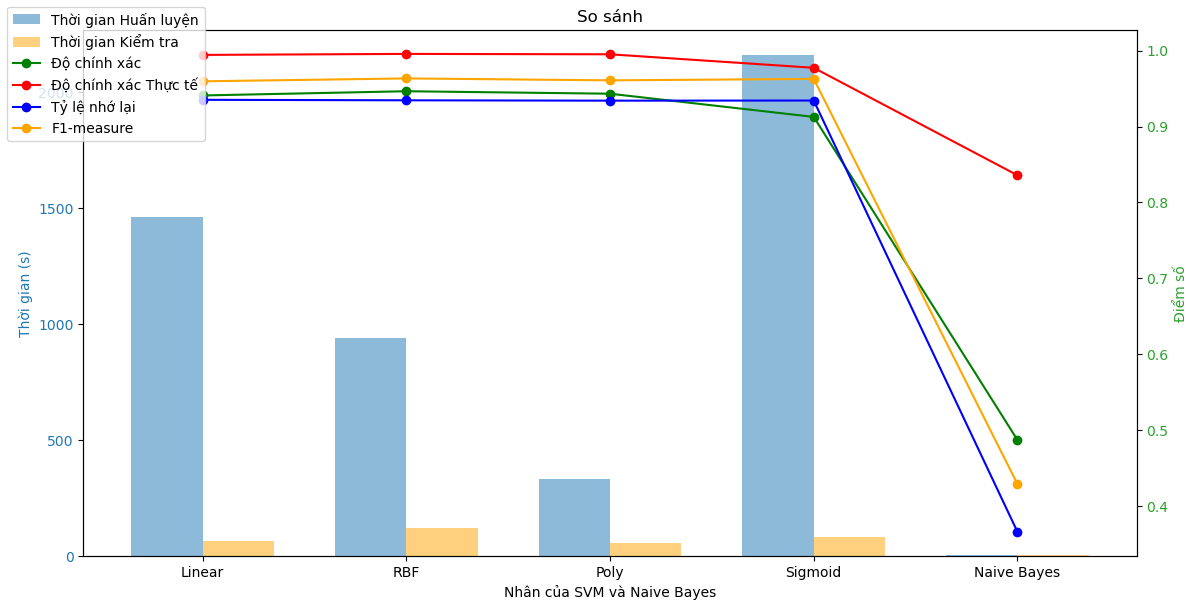

In [43]:
# Thời gian huấn luyện và thời gian kiểm tra của từng mô hình
train_times = [1460.859, 940.320, 332.467, 2160.604, 1.681]
test_times = [63.916, 120.405, 55.853, 80.846, 1.298]

# Tên của các mô hình
model_names = ['Linear', 'RBF', 'Poly', 'Sigmoid', 'Naive Bayes']

# Vẽ biểu đồ
x = np.arange(len(model_names))  # Vị trí của các nhóm
width = 0.35  # Độ rộng của cột

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Nhân của SVM và Naive Bayes')
ax1.set_ylabel('Thời gian (s)', color=color)
ax1.bar(x - width/2, train_times, width,
        color=color, alpha=0.5, label='Thời gian Huấn luyện')
ax1.bar(x + width/2, test_times, width,
        color='orange', alpha=0.5, label='Thời gian Kiểm tra')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Điểm số', color=color)
# Độ chính xác tổng quát của từng mô hình
accuracies = [0.94094, 0.94651,
              0.94325, 0.91269,
              0.48696]
# Độ chính xác thực tế của từng mô hình
precisions = [0.99438, 0.99571,
              0.99518, 0.97740, 
              0.83581]
# Tỷ lệ nhớ lại của từng mô hình
recalls = [0.93522, 0.93457,
           0.93410, 0.93427, 
           0.36593]
f1 = [0.95959, 0.96339,
           0.96087, 0.96277, 
           0.42884]
ax2.plot(x, accuracies, color='green', marker='o', label='Độ chính xác')
ax2.plot(x, precisions, color='red', marker='o', label='Độ chính xác Thực tế')
ax2.plot(x, recalls, color='blue', marker='o', label='Tỷ lệ nhớ lại')
ax2.plot(x, f1, color='orange', marker='o', label='F1-measure')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left')
plt.title('So sánh')
plt.xticks(x, model_names)
plt.show()